<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_Pytorch/blob/main/EDA/Chatbot_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls

drive/  sample_data/


In [3]:
cd drive/MyDrive/Pytorch\ NLP/data_in/Chatbot

/content/drive/MyDrive/Pytorch NLP/data_in/Chatbot


In [4]:
ls

ChatbotData.csv


In [5]:
df=pd.read_csv('ChatbotData.csv')
df.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [6]:
len(df)

11823

### 전체 문장 길이 분석

In [9]:
text=df['Q']+df['A']
text.head()

0              12시 땡!하루가 또 가네요.
1          1지망 학교 떨어졌어위로해 드립니다.
2       3박4일 놀러가고 싶다여행은 언제나 좋죠.
3    3박4일 정도 놀러가고 싶다여행은 언제나 좋죠.
4             PPL 심하네눈살이 찌푸려지죠.
dtype: object

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh

In [13]:
from konlpy.tag import Mecab
mecab=Mecab()

a='안녕하세요 저는 사람입니다'
print(mecab.morphs(a))
print(mecab.nouns(a))
print(mecab.pos(a))

['안녕', '하', '세요', '저', '는', '사람', '입니다']
['안녕', '저', '사람']
[('안녕', 'NNG'), ('하', 'XSV'), ('세요', 'EP+EF'), ('저', 'NP'), ('는', 'JX'), ('사람', 'NNG'), ('입니다', 'VCP+EC')]


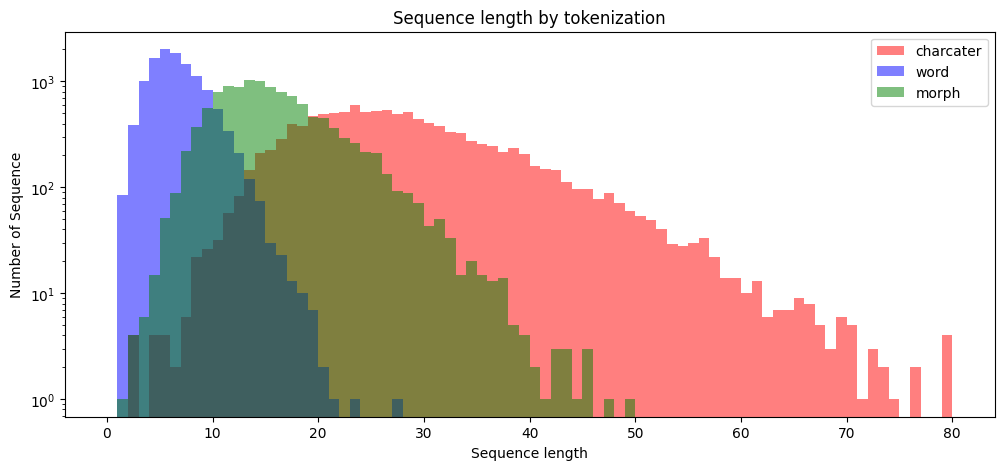

In [20]:
len_by_character_level=[len(sent) for sent in text]
tokenized_by_space=[sent.split() for sent in text]
len_by_word_level=[len(sent) for sent in tokenized_by_space]
len_by_morph_level=[len(mecab.morphs(sent)) for sent in text]
plt.figure(figsize=(12,5))

plt.hist(len_by_character_level,bins=80,range=[0,80],color='r',alpha=0.5,label='charcater')
plt.hist(len_by_word_level,bins=80,range=[0,80],color='b',alpha=0.5,label='word')
plt.hist(len_by_morph_level,bins=80,range=[0,80],color='g',alpha=0.5,label='morph')

plt.title('Sequence length by tokenization')
plt.xlabel('Sequence length')
plt.ylabel('Number of Sequence')
plt.yscale('log')
plt.legend()
plt.show()

- 입력과 출력 모델의 sequence 길이를 맞추기로 하고
- word 단위로 나눌 것이기에
- 최대한 문장이 잘리지 않도록 25 정도에서 끊도록 하자 => Max_length=25

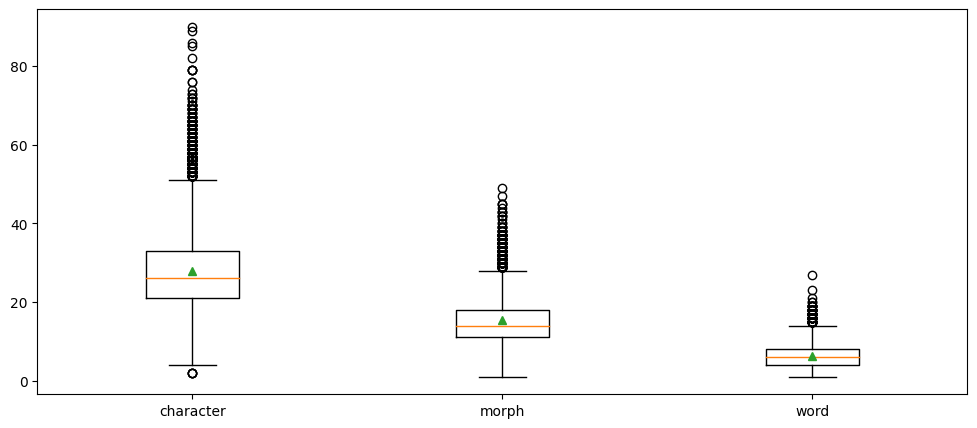

In [24]:
plt.figure(figsize=(12,5))
plt.boxplot([len_by_character_level,len_by_morph_level,len_by_word_level],labels=['character','morph','word'],showmeans=True)
plt.show()

### Q, A 문장 길이 따로 분석

Q 문장 길이 분석

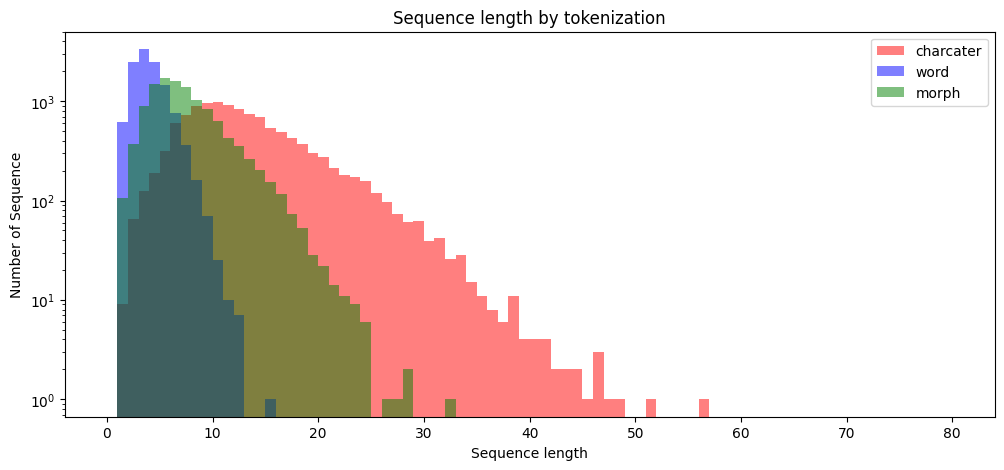

In [26]:
text1=df['Q']
text2=df['A']

len_by_character_level=[len(sent) for sent in text1]
tokenized_by_space=[sent.split() for sent in text1]
len_by_word_level=[len(sent) for sent in tokenized_by_space]
len_by_morph_level=[len(mecab.morphs(sent)) for sent in text1]
plt.figure(figsize=(12,5))

plt.hist(len_by_character_level,bins=80,range=[0,80],color='r',alpha=0.5,label='charcater')
plt.hist(len_by_word_level,bins=80,range=[0,80],color='b',alpha=0.5,label='word')
plt.hist(len_by_morph_level,bins=80,range=[0,80],color='g',alpha=0.5,label='morph')

plt.title('Sequence length by tokenization')
plt.xlabel('Sequence length')
plt.ylabel('Number of Sequence')
plt.yscale('log')
plt.legend()
plt.show()


A 문장 길이 분석

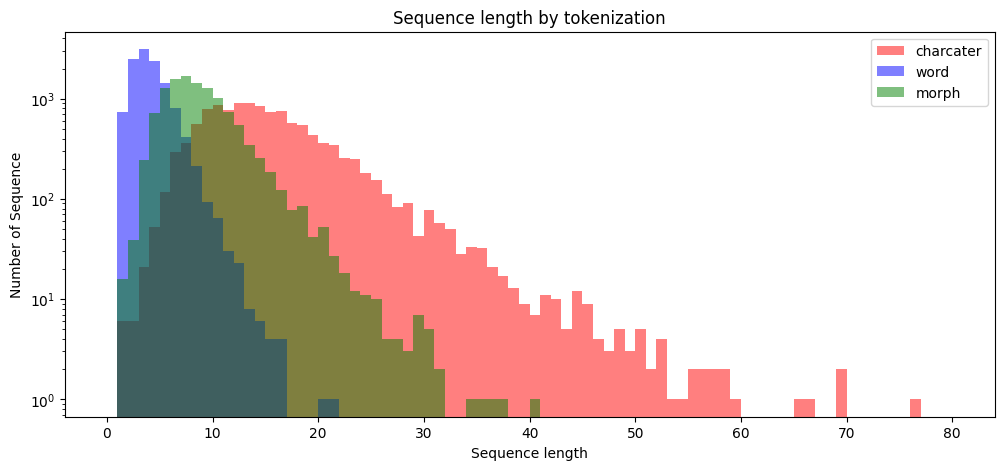

In [27]:
len_by_character_level=[len(sent) for sent in text2]
tokenized_by_space=[sent.split() for sent in text2]
len_by_word_level=[len(sent) for sent in tokenized_by_space]
len_by_morph_level=[len(mecab.morphs(sent)) for sent in text2]
plt.figure(figsize=(12,5))

plt.hist(len_by_character_level,bins=80,range=[0,80],color='r',alpha=0.5,label='charcater')
plt.hist(len_by_word_level,bins=80,range=[0,80],color='b',alpha=0.5,label='word')
plt.hist(len_by_morph_level,bins=80,range=[0,80],color='g',alpha=0.5,label='morph')

plt.title('Sequence length by tokenization')
plt.xlabel('Sequence length')
plt.ylabel('Number of Sequence')
plt.yscale('log')
plt.legend()
plt.show()

- 답변이 살짝 길다